# Logistic Regression

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\Farzana Saif\\Downloads\\spam.csv")

In [3]:
data

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crl.tot,4601.0,283.289285,606.347851,1.0,35.0,95.0,266.000,15841.000
dollar,4601.0,0.075811,0.245882,0.0,0.0,0.0,0.052,6.003
bang,4601.0,0.269071,0.815672,0.0,0.0,0.0,0.315,32.478
money,4601.0,0.094269,0.442636,0.0,0.0,0.0,0.000,12.500
n000,4601.0,0.101645,0.350286,0.0,0.0,0.0,0.000,5.450
make,4601.0,0.104553,0.305358,0.0,0.0,0.0,0.000,4.540


In [5]:
data.columns

Index(['crl.tot', 'dollar', 'bang', 'money', 'n000', 'make', 'yesno'], dtype='object')

In [6]:
data.dtypes

crl.tot      int64
dollar     float64
bang       float64
money      float64
n000       float64
make       float64
yesno       object
dtype: object

array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

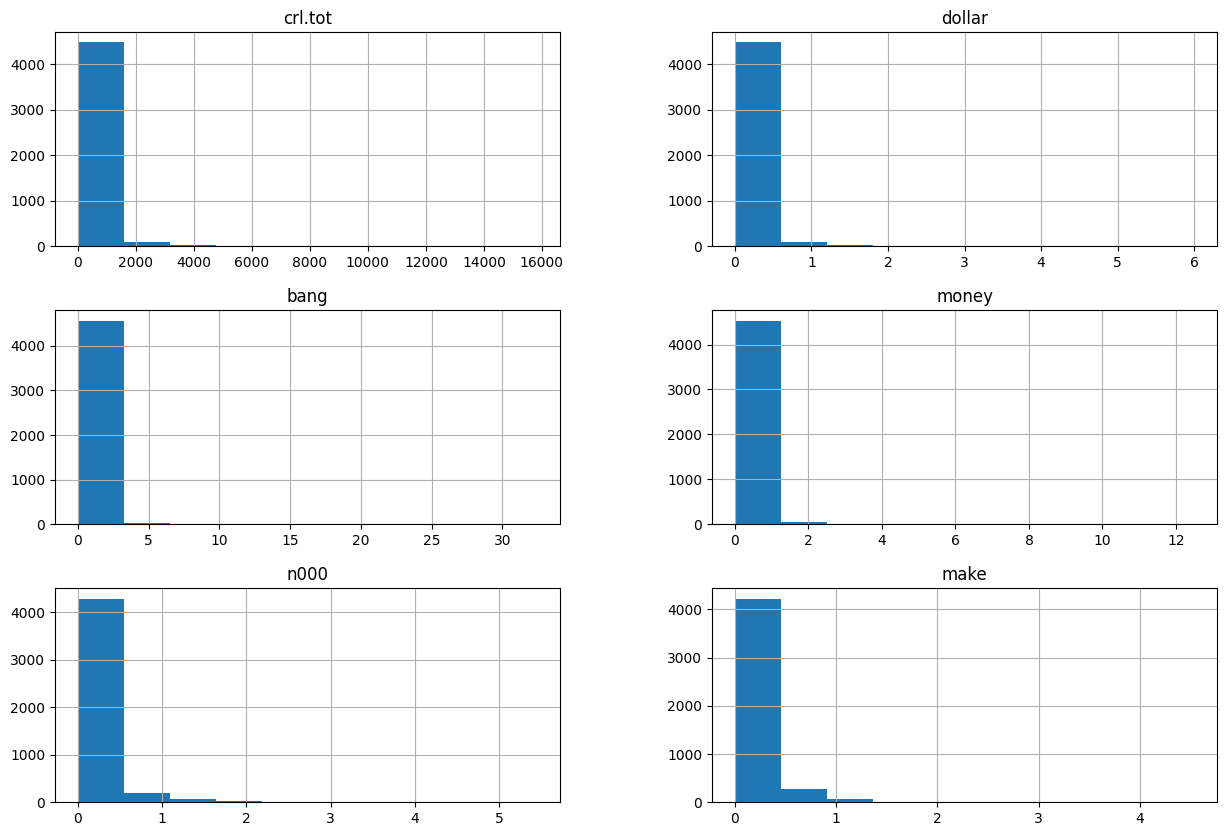

In [7]:
#Histogram
data.hist(figsize=(15,10))

In [8]:
#removing outliers
print(len(data))

4601


In [9]:
#number of words (crl.tot)removing anything that is above 5000
print(len(data))
data = data[data["crl.tot"]<5000]
print(len(data))

4601
4594


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

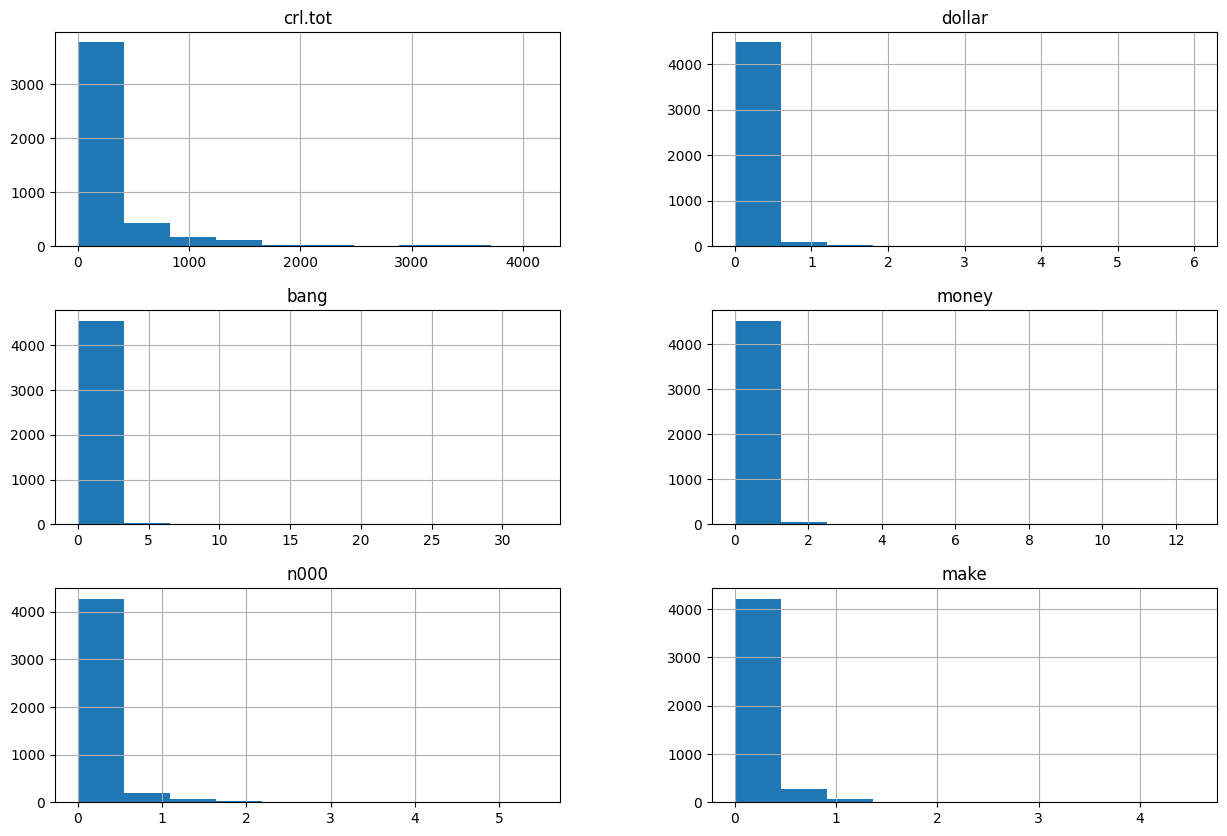

In [10]:
data.hist(figsize=(15,10))

Not much better, will try to improve

In [11]:
print(len(data))
data = data[data["crl.tot"]<1500]
print(len(data))

4594
4462


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

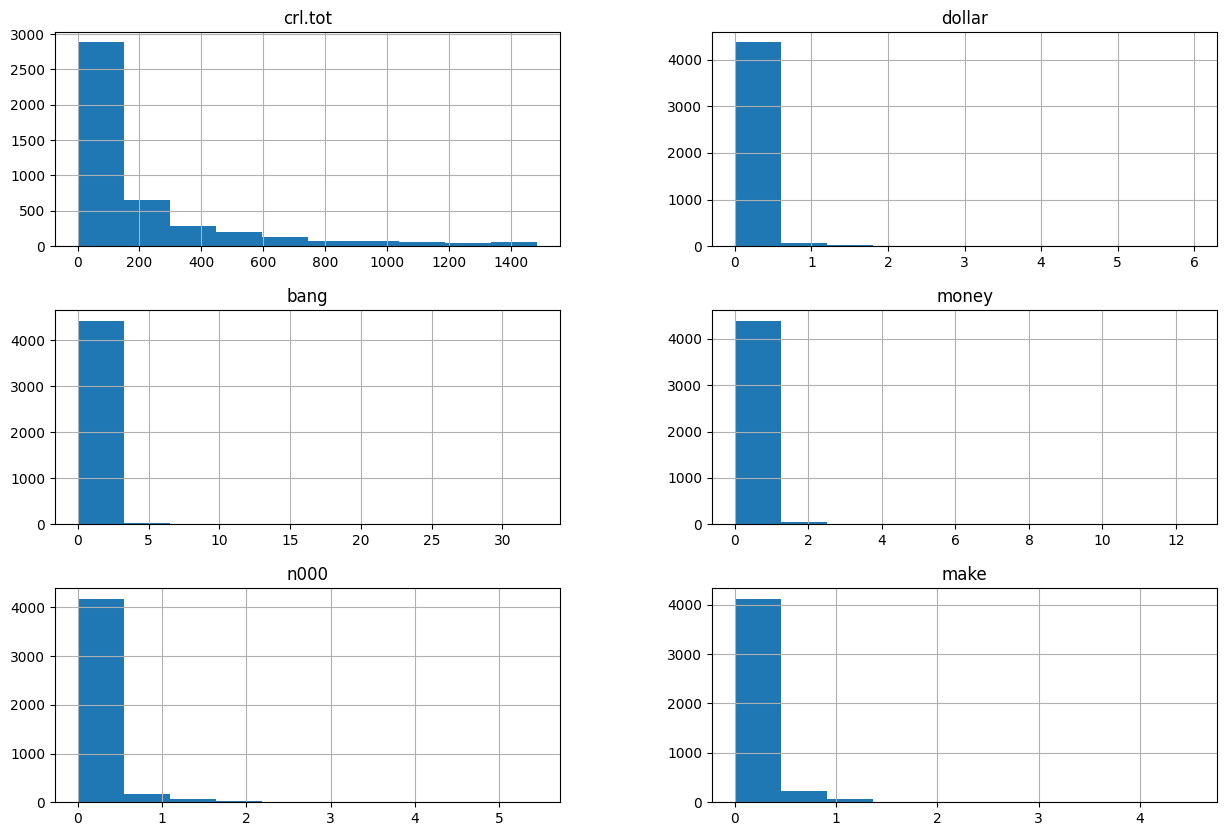

In [12]:
data.hist(figsize=(15,10))

In [13]:
print(len(data))
data = data[data["crl.tot"]<1500]
data = data[data["bang"]<5]
print(len(data))

4462
4439


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

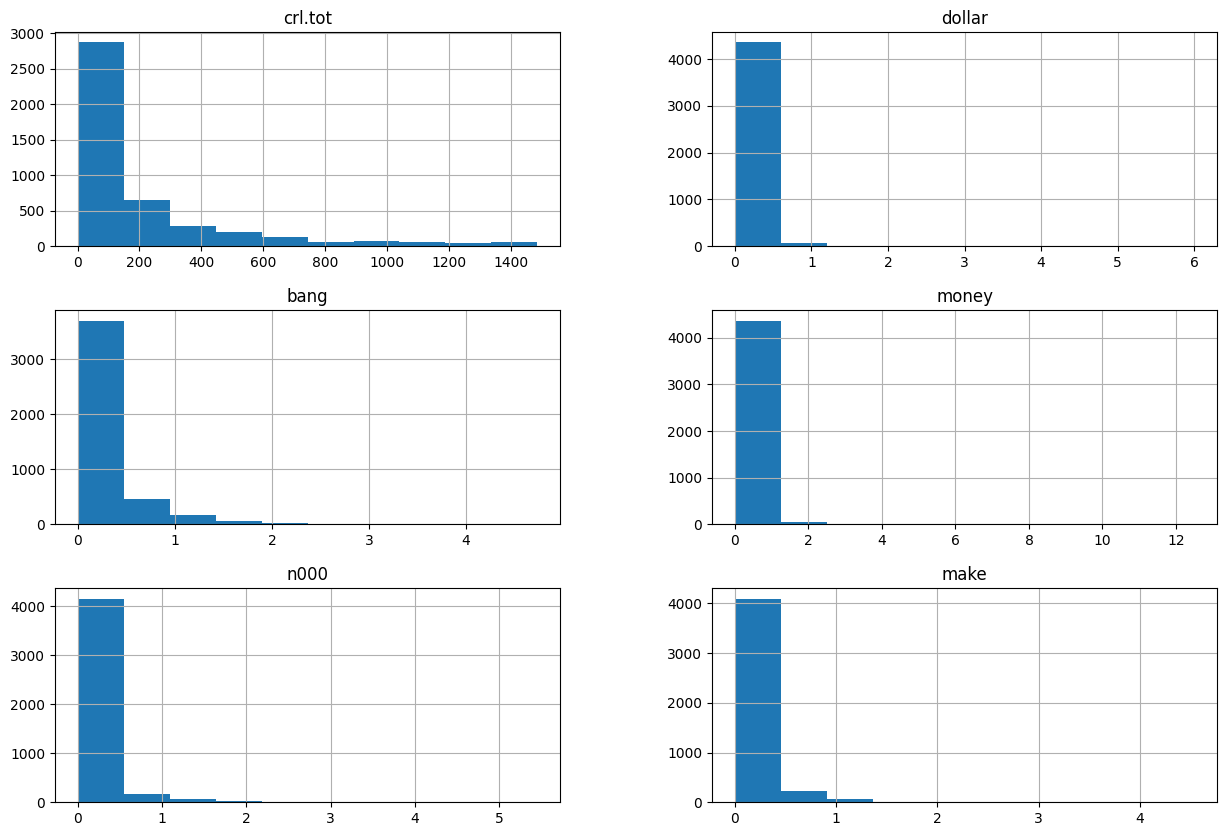

In [14]:
data.hist(figsize=(15,10))

In [15]:
print(len(data))
data = data[data["crl.tot"]<1500]
data = data[data["bang"]<5]
data = data[data["money"]<3]
print(len(data))

4439
4426


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

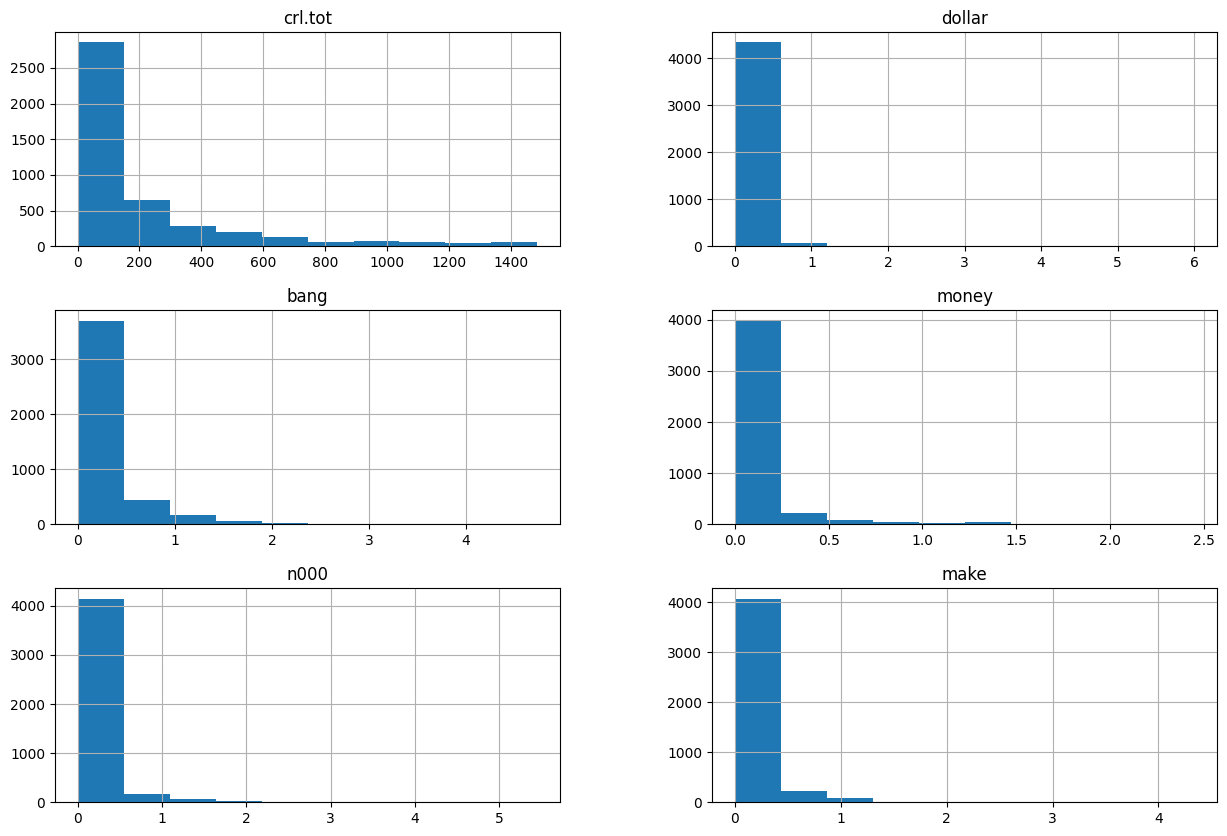

In [16]:
data.hist(figsize=(15,10))

# Correlation Matrix

In [17]:
# Convert yes/no style columns to 1/0
data = data.replace({'y': 1, 'n': 0, 'yes': 1, 'no': 0})

# For all other categorical columns, create dummies
data_encoded = pd.get_dummies(data, drop_first=True)


C:\Users\Farzana Saif\AppData\Local\Temp\ipykernel_12688\3672958876.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'y': 1, 'n': 0, 'yes': 1, 'no': 0})


In [18]:
data.head(1)

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.0,0.778,0.0,0.0,0.0,1


<Axes: >

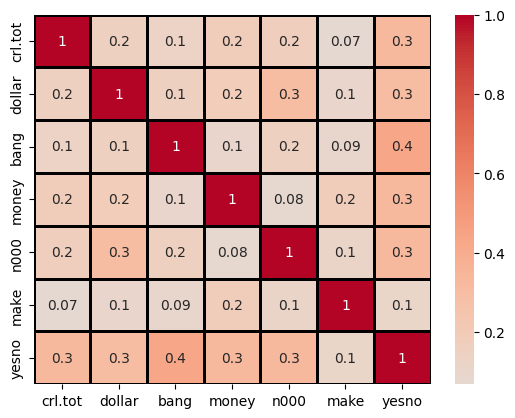

In [19]:
sns.heatmap(data.corr(),
            annot = True,
            fmt= '.1g',
            center= 0,
            cmap='coolwarm',
            linewidths=1,
            linecolor='black')

# Logistic Regression preperation

In [20]:
#prepare the X and y
y = data.yesno
y

0       1
1       1
3       1
4       1
5       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: yesno, Length: 4426, dtype: int64

In [21]:
y = data.yesno
X = data.iloc[:, :-1]
X


,crl.tot,dollar,bang,money,n000,make
0,278,0.00,0.778,0.00,0.00,0.00
1,1028,0.18,0.372,0.43,0.43,0.21
3,191,0.00,0.137,0.00,0.00,0.00
4,191,0.00,0.135,0.00,0.00,0.00
5,54,0.00,0.000,0.00,0.00,0.00
...,...,...,...,...,...,...
4596,88,0.00,0.000,0.00,0.00,0.31
4597,14,0.00,0.353,0.00,0.00,0.00
4598,118,0.00,0.000,0.00,0.00,0.30
4599,78,0.00,0.000,0.00,0.00,0.96


In [22]:
y = data.yesno
X = data.iloc[:, :-1]
X = sm.add_constant(X)
X.head(2)


,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21


In [23]:
#training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,
                                                     test_size= 0.2,
                                                     random_state= 1502)

In [24]:
#logistic regression
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.385174
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3540
Model:                          Logit   Df Residuals:                     3533
Method:                           MLE   Df Model:                            6
Date:                Wed, 24 Sep 2025   Pseudo R-squ.:                  0.4222
Time:                        21:45:33   Log-Likelihood:                -1363.5
converged:                       True   LL-Null:                       -2359.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1992      0.074    -29.525      0.000      -2.345      -2.053
crl.tot        0.0017      0.

In [25]:
#Create the function
def logistic_reader(coefficient):
    coefficient = 2
    print(coefficient)


In [26]:
#Apply the function
logistic_reader(5)

2


In [27]:
#Create the function
def logistic_reader(coefficient):
    probability = (np.exp(coefficient)-1)*100
    print(probability)

In [28]:
#Apply the function
logistic_reader(5)

14741.31591025766


In [29]:
#Create the function
def logistic_reader(coefficient):
    probability = round((np.exp(coefficient)-1)*100,2)
    print(probability)

In [30]:
#Apply the function
logistic_reader(5)

14741.32


In [31]:
#Create the function
def logistic_reader(coefficient):
    probability = round((np.exp(coefficient)-1)*100,2)
    if probability > 0:
        print("The likelihood increases by", probability, "%")
    elif probability ==0:
        print("No impact")
    else:
        print("The likelihood decreases by", probability, "%")

In [32]:
#Apply the function
logistic_reader(5)

The likelihood increases by 14741.32 %


In [33]:
#Apply the function
logistic_reader(0.0017)

The likelihood increases by 0.17 %


In [34]:
#Apply the function
logistic_reader( 6.7822)

The likelihood increases by 88100.7 %


In [37]:
#Assess the model
predictions = model.predict(X_test)
predictions


749     0.194713
3173    0.100565
288     0.963428
4224    0.193521
764     0.125914
          ...   
4154    0.114704
2078    0.103755
3455    0.110535
3597    0.100565
3137    0.101166
Length: 886, dtype: float64